In [3]:
!pip install rich
import numpy as np
from rich import print

In [4]:
import numpy as np

def relu(x):
  return np.maximum(0,x)

def softmax(input):
  e_x = np.exp(input)
  return e_x/e_x.sum(axis=0)

X1 = [0,0,1,1]
X2 = [0,1,0,1]
X = np.array([X1,X2]).T
y = np.array([[1,0,0,1],[0,1,1,0]]).T

W1 = np.array([[1,-1],[-1,1]])
b1 = [0,0]

W2 = np.array([[-1,1],[-1,1]])
b2 = [1,0]

z1 = (X@W1)+b1
a = relu(z1)
z2 = (a@W2)+b2
s = np.array([softmax(zi) for zi in z2])
loss = -(np.log(s)*y).sum()/4


print(f"X:{X}\nz1:{z1}\na:{a}\nz2:{z2}\ns:{s}\nloss:{loss}")

X:[[0 0]
 [0 1]
 [1 0]
 [1 1]]
z1:[[ 0  0]
 [-1  1]
 [ 1 -1]
 [ 0  0]]
a:[[0 0]
 [0 1]
 [1 0]
 [0 0]]
z2:[[1 0]
 [0 1]
 [0 1]
 [1 0]]
s:[[0.73105858 0.26894142]
 [0.26894142 0.73105858]
 [0.26894142 0.73105858]
 [0.73105858 0.26894142]]
loss:0.3132616875182228

In [5]:
W2 = W2 - (((s-y)/4)*a).sum(axis=0)

z1 = (X@W1)+b1
a = relu(z1)
z2 = (a@W2)+b2
s = np.array([softmax(zi) for zi in z2])
loss = -(np.log(s)*y).sum()/4


print(f"z2:{z2}\ns:{s}\nloss:{loss}")

z2:[[ 1.          0.        ]
 [-0.06723536  1.06723536]
 [-0.06723536  1.06723536]
 [ 1.          0.        ]]
s:[[0.73105858 0.26894142]
 [0.24333699 0.75666301]
 [0.24333699 0.75666301]
 [0.73105858 0.26894142]]
loss:0.2960494893518514

In [8]:
import torch
import torch.nn as nn
import numpy as np

np.random.seed(7)

X1 = [0,0,1,1]
X2 = [0,1,0,1]
X = np.array([X1,X2])
y = [0,1,1,0]

y = np.array([[1,0,0,1],[0,1,1,0]]).T

W0 = np.array([np.random.uniform(-1,1,2),
               np.random.uniform(-1,1,2)])
b0 = [np.random.uniform(-1,1,2)]

W1 = np.array([np.random.uniform(-1,1,2),
               np.random.uniform(-1,1,2)])
b1 = [np.random.uniform(-1,1,2)]

print(W0,b0,W1,b1)

class SimpleNet(nn.Module):
    def __init__(self, hidden_size=2):
        super(SimpleNet, self).__init__()
        self.layer1 = nn.Linear(2, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, 2)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


# Test the model
def test(model):
    with torch.no_grad():
        l = 0
        for j in range(4):
            test_input = torch.tensor(X[:,j], dtype=torch.float32)
            prediction = model(test_input.view((1,2)))
            print(f"Prediction probabilities for test input {X[:,j]},{y[j]}: {softmax(prediction.numpy()[0])}, {np.argmax(prediction.numpy())}")
            s = softmax(prediction.numpy()[0])
            l += (np.log(s)*y[j]).sum()

model = SimpleNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1)
print(model,count_parameters(model))

# Modelin parametrelerini Numpy ile oluşturduğumuz random değerler ile başlat
with torch.no_grad():
    model.layer1.weight.data = torch.tensor(W0,dtype=torch.float32)
    model.layer1.bias.data = torch.tensor(b0,dtype=torch.float32)
    model.layer2.weight.data = torch.tensor(W1,dtype=torch.float32)
    model.layer2.bias.data = torch.tensor(b1,dtype=torch.float32)

#print(f'Loss: {loss.item():.4f}')
test(model)
# Training loop
losses = []
for epoch in range(100):
    # Forward pass
    outputs = model(torch.tensor(X,dtype=torch.float32).T)
    loss = criterion(outputs, torch.tensor(y,dtype=torch.float32))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if (epoch + 1) % 50 == 0 or epoch == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')


print(f'Loss: {loss.item():.4f}')
test(model)

[[-0.84738342  0.55983758]
 [-0.12318154  0.44693036]]
[array([0.95597902, 0.07699174])]
[[ 2.24092732e-03 -8.55897733e-01]
 [-4.63122040e-01 -2.34998349e-04]]
[array([0.35845999, 0.60747807])]

SimpleNet(
  (layer1): Linear(in_features=2, out_features=2, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=2, out_features=2, bias=True)
) 12

Prediction probabilities for test input [0 0],[1 0]: [0.53244936 0.4675506 ], 0

Prediction probabilities for test input [0 1],[0 1]: [0.50202155 0.49797842], 0

Prediction probabilities for test input [1 0],[0 1]: [0.45054182 0.5494582 ], 1

Prediction probabilities for test input [1 1],[1 0]: [0.43024468 0.56975526], 1

Epoch [1/1000], Loss: 0.6924

Epoch [50/1000], Loss: 0.0709

Epoch [100/1000], Loss: 0.0209

Loss: 0.0209

Prediction probabilities for test input [0 0],[1 0]: [0.9862883  0.01371173], 0

Prediction probabilities for test input [0 1],[0 1]: [0.00810814 0.9918918 ], 1

Prediction probabilities for test input [1 0],[0 1]: [0.05181301 0.948187  ], 1

Prediction probabilities for test input [1 1],[1 0]: [0.99134845 0.00865158], 0

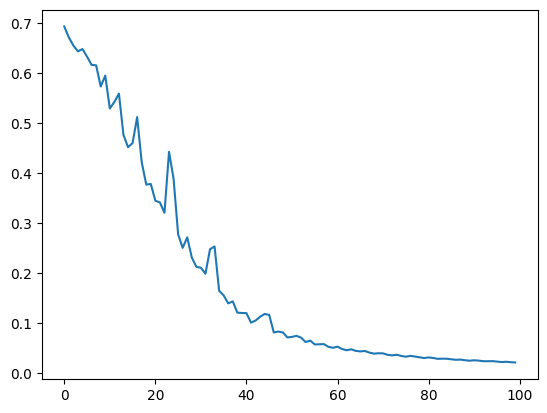

In [7]:
import matplotlib.pyplot as plt

plt.plot(losses)